### Write a function that takes in a number between 1 and 100 and tries to guess it. Based on whether a guess is larger or smaller than the input number, the code would come up with a new guess until it gets it right.

In [1]:
def guess(answer, small_int=0, large_int=100, verbose=False):
    '''computer returns number of guesses required to determine user-defined integer'''
    
    # error checking
    assert type(answer) == int, 'answer must be an integer'
    #assert -1 < answer < 101, 'enter an integer between 1-100 inclusive'
    
    # useful functions
    def new_guess(start, stop):
        '''returns binary search value as updated guess'''
        return (start+stop)//2
    def checker(guess, answer):
        '''check if guess equals answer'''
        return True if guess == answer else 'bigger' if guess < answer else 'smaller'
    
    # setup
    start = small_int
    stop = large_int
    guesses = 0
    
    # main logic
    while True:
        guesses += 1
        guess = new_guess(start, stop)
        check = checker(guess, answer)
        if verbose:
            print('guess: {}'.format(guess))
        if check == True:
            return print('{} guess'.format(guesses)) \
                if guesses == 1 else print('\n{} guesses'.format(guesses))
            break
        else:
            if check == 'smaller':
                stop = guess
            else:
                start = guess

---

#### Example #1

In [2]:
guess(50, verbose=False)

1 guess


In [3]:
guess(80, verbose=True)

guess: 50
guess: 75
guess: 87
guess: 81
guess: 78
guess: 79
guess: 80

7 guesses


#### Example #2

In [4]:
guess(0, verbose=False)


7 guesses


In [5]:
guess(0, verbose=True)

guess: 50
guess: 25
guess: 12
guess: 6
guess: 3
guess: 1
guess: 0

7 guesses


#### Example #3

In [6]:
guess(120, small_int=0, large_int=1000, verbose=True)

guess: 500
guess: 250
guess: 125
guess: 62
guess: 93
guess: 109
guess: 117
guess: 121
guess: 119
guess: 120

10 guesses


---

## What's the maximum number of guesses we could possibly need?

In [7]:
def howManyGuesses(start, stop):
    '''returns total number of guesses for binary search given start and stop values'''
    
    # inclusive of both ends
    how_many_numbers = stop - start + 1
    
    # main logic
    num_guesses = 1
    while 2**num_guesses < how_many_numbers:
        num_guesses += 1
    return num_guesses

In [8]:
print('It will take no more than %d guesses' % howManyGuesses(0, 100))

It will take no more than 7 guesses


In [9]:
print('It will take no more than %d guesses' % howManyGuesses(0, int(1e6)))

It will take no more than 20 guesses


---

## Plot number of guesses as function of guess space 

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [11]:
num_numbers = np.geomspace(1, 1e9, num=10)
num_numbers

array([  1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03,   1.00000000e+04,   1.00000000e+05,
         1.00000000e+06,   1.00000000e+07,   1.00000000e+08,
         1.00000000e+09])

In [12]:
guesses = [howManyGuesses(0,numbers) for numbers in num_numbers]
guesses

[1, 4, 7, 10, 14, 17, 20, 24, 27, 30]

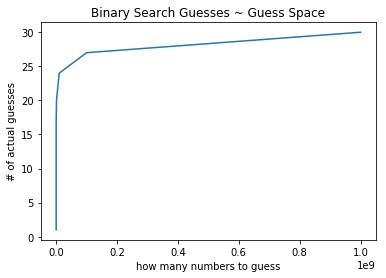

In [13]:
plt.plot(num_numbers, guesses)
plt.xlabel('how many numbers to guess')
plt.ylabel('# of actual guesses')
plt.title('Binary Search Guesses ~ Guess Space');

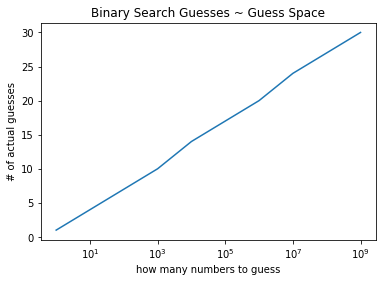

In [14]:
# x-axis on log scale
plt.plot(num_numbers, guesses)
plt.xlabel('how many numbers to guess')
plt.ylabel('# of actual guesses')
plt.title('Binary Search Guesses ~ Guess Space')
plt.xscale('log');